In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('credit.csv')
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [3]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

# Feature scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

x_scaled = sc.fit_transform(x)

# Training the SOM

In [5]:
from minisom import MiniSom

In [6]:
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [7]:
# initialize the weight with random values and close to 0
som.random_weights_init(x_scaled)

In [8]:
# organize the map with the values of the dataset
som.train_random(data=x_scaled, num_iteration=100)

# Visualizing the results

In [9]:
from pylab import bone, pcolor, colorbar, plot, show

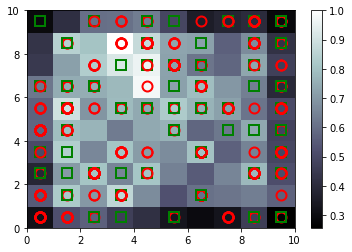

In [10]:
# initialize the figure where all the plots are going to be
bone()
pcolor(som.distance_map().T)
colorbar()
# o is for disaproval and s for approval
markers = np.array(['o', 's'])
# red denied and green accepted
colors = np.array(['r', 'g'])

markers[1]
# j is the vector or row of data
for i, j in enumerate(x_scaled):
    w = som.winner(j)
    numero = y[i]
    #the coordinates and to paint depending if it was accepted or not
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]], 
         markeredgecolor = colors[y[i]], 
         markerfacecolor = 'None', 
         markersize=10, 
         markeredgewidth=2)
    
show()
# the frauds are the white ponts, they are outliers

# Finding the frauds

In [14]:
# the winning nodes
mappings = som.win_map(x_scaled)
mappings.

In [18]:
#the outliers winning nodes
frauds = np.concatenate((mappings[(1,1)], mappings[(,7)]), axis = 0)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [19]:
frauds = sc.inverse_transform(frauds)
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
985150174742081280
985689191750331776
984449820582338816
985975320413279104
982152309696772352
985593773952967040
983518530407144320
984240026157283328
983729509759095296
985044092602658048
983018740715588224
986141833824366592
980778231050146816
978654218407893248
978786556032734976
983063393750171904
980623754001733504
981016526085264896
980930400609342848
981404620825788160
979641324876317312
978296370485488768
981399008014178560
974440992555366144
983187187428452352
981468981065579264
973837677671897856
982164283694872960
982182681244038144
980862111401424896
976981725277352448
